milhouse_van_houten
333 - milhouse_van_houten
334 - milhouse_van_houten
335 - milhouse_van_houten
336 - milhouse_van_houten
337 - milhouse_van_houten
338 - milhouse_van_houten
339 - milhouse_van_houten
340 - milhouse_van_houten
341 - milhouse_van_houten
342 - milhouse_van_houten
343 - milhouse_van_houten
344 - milhouse_van_houten
345 - milhouse_van_houten
346 - milhouse_van_houten
347 - milhouse_van_houten
348 - milhouse_van_houten
349 - milhouse_van_houten
350 - milhouse_van_houten
351 - milhouse_van_houten
352 - milhouse_van_houten
353 - milhouse_van_houten
354 - milhouse_van_houten
355 - milhouse_van_houten
356 - milhouse_van_houten
357 - milhouse_van_houten
358 - milhouse_van_houten
359 - milhouse_van_houten
360 - milhouse_van_houten
361 - milhouse_van_houten
362 - milhouse_van_houten
363 - milhouse_van_houten
364 - milhouse_van_houten
365 - milhouse_van_houten
366 - milhouse_van_houten
367 - milhouse_van_houten
368 - milhouse_van_houten
369 - milhouse_van_houten
370 - milhouse_van

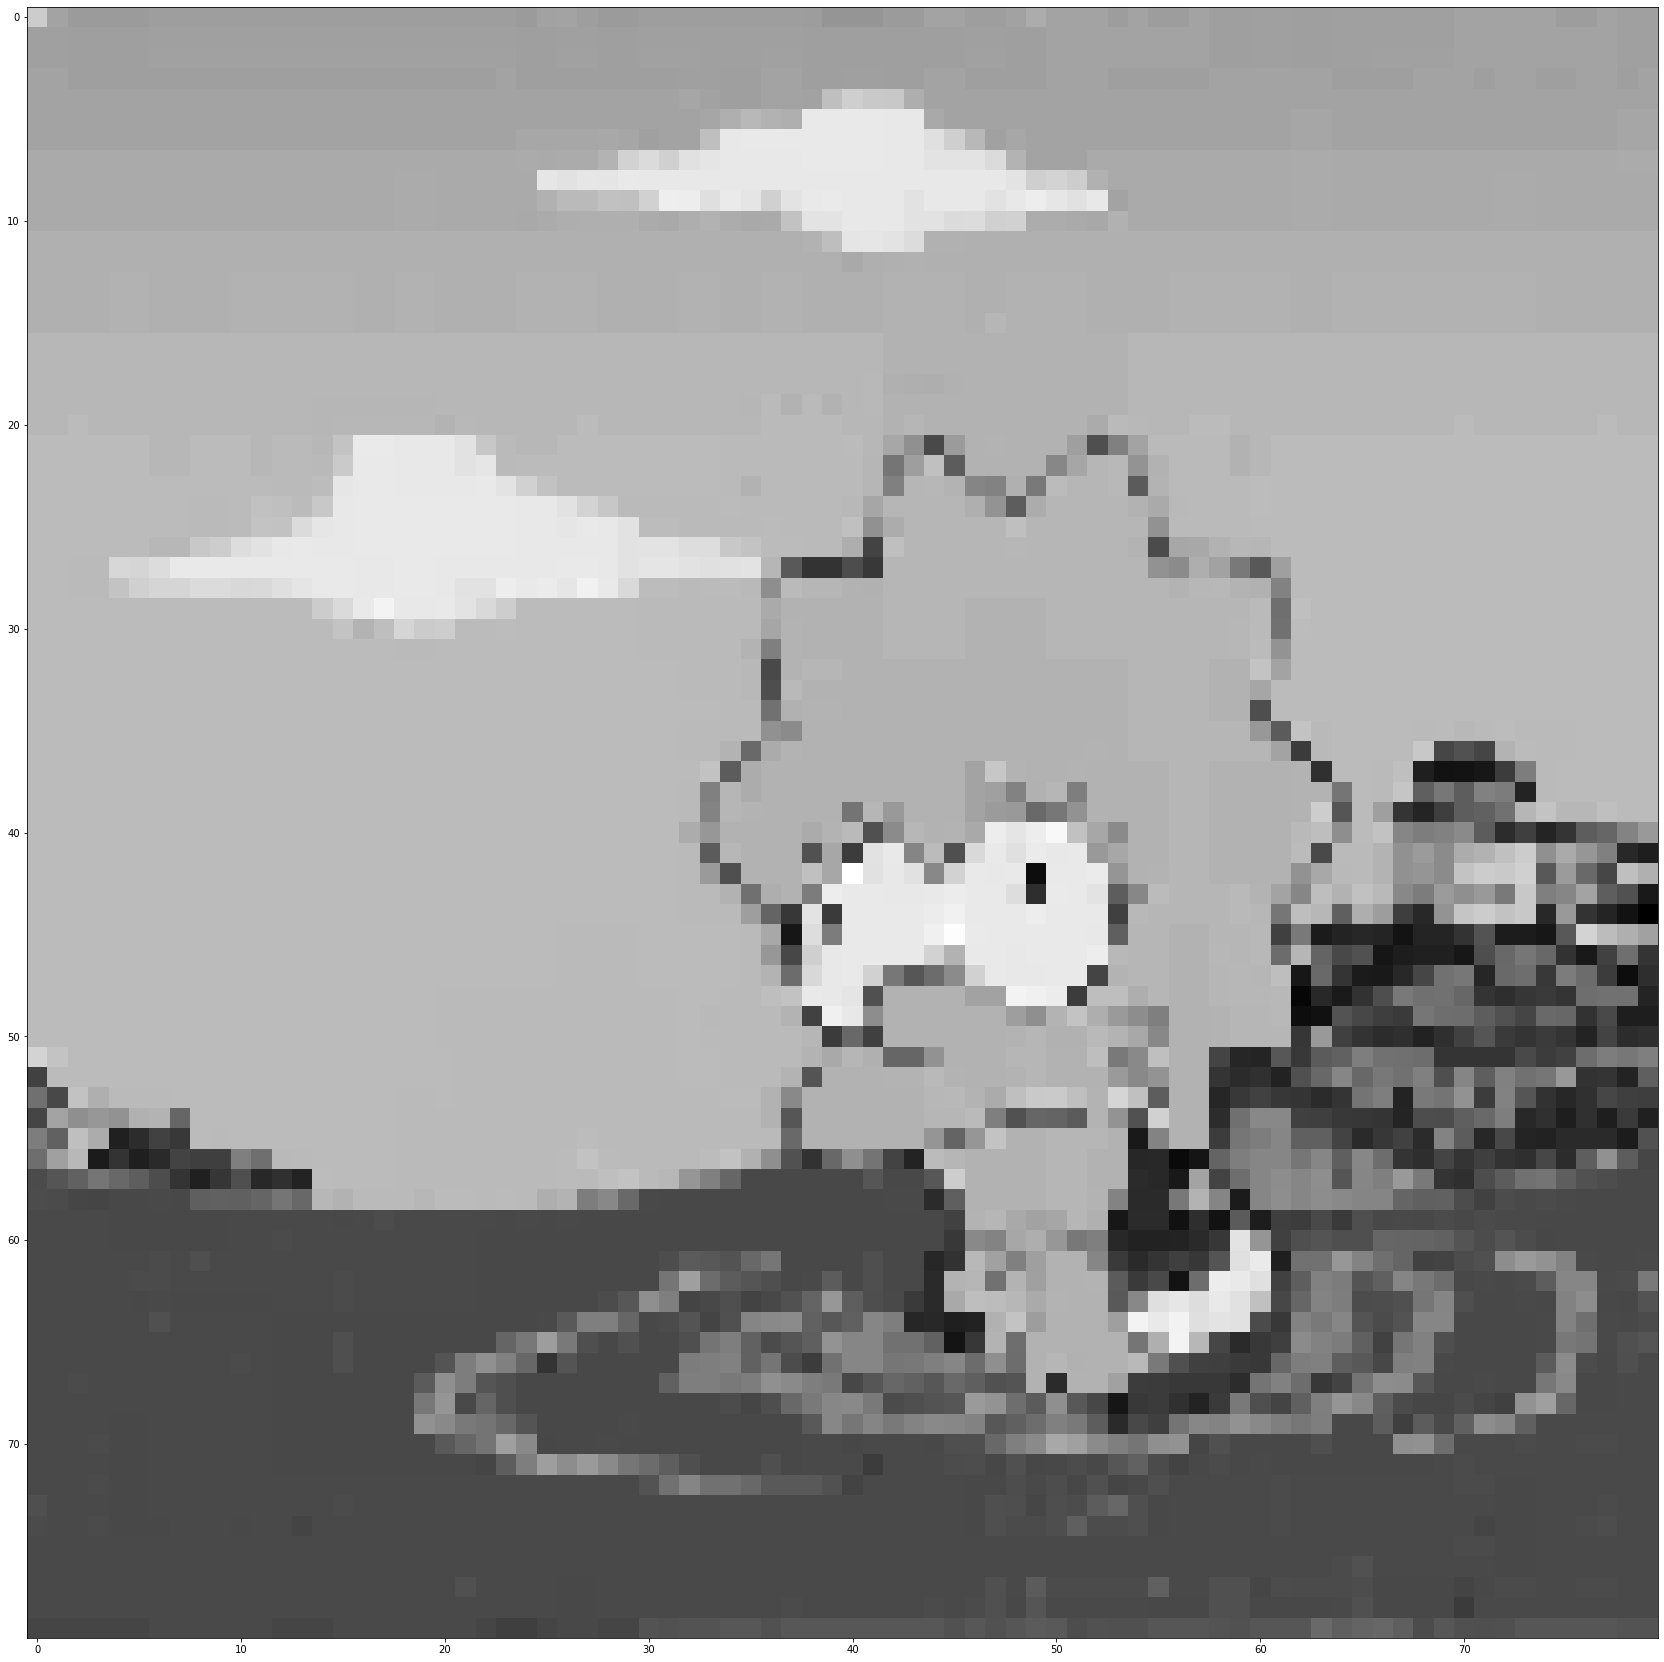

/Users/Hb.Zh/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_______________________________________________

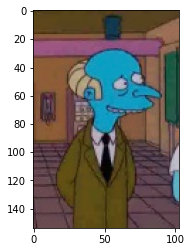

lisa_simpson


In [1]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import sklearn.model_selection as skm


IMG_SIZE = (80,80)
channels = 1
char_path = r'./simpsons_dataset'

# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

# Number of training samples
len(train)

# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)


# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))


# Creating train and validation data

split_data = skm.train_test_split(featureSet, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

# Deleting variables to save memory
del train
del featureSet
del labels 
gc.collect()

# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 10

# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Create our model (returns the compiled model)
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

model.summary()

# Training the model

callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

print(characters)


"""## Testing"""

test_path = r'./kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

predictions = model.predict(prepare(img))

# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])
